>> Probabilitas Tidak Ada Pelanggan (X=0)
Teoritis  : 0.0003
Simulasi  : 0.0000

>> Probabilitas Lebih dari 10 Pelanggan (X>10)
Teoritis  : 0.1841
Simulasi  : 0.1806


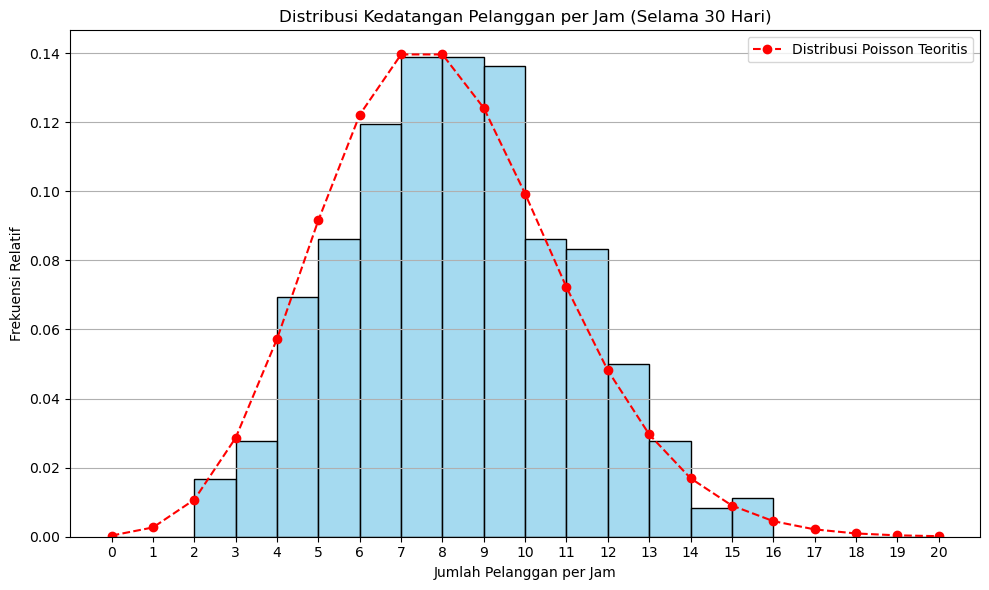

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

# Setup
lam = 8  # rata-rata kedatangan per jam
jam_total = 12 * 30  # 12 jam per hari × 30 hari
np.random.seed(42)  # reproducibility

# Simulasi kedatangan pelanggan per jam
simulasi = np.random.poisson(lam, jam_total)

# Hitung probabilitas
prob_teoritis_0 = poisson.pmf(0, mu=lam)
prob_simulasi_0 = np.mean(simulasi == 0)

prob_teoritis_gt10 = 1 - poisson.cdf(10, mu=lam)
prob_simulasi_gt10 = np.mean(simulasi > 10)  # <- diperbaiki (kurung ditutup)

# Tampilkan hasil
print(">> Probabilitas Tidak Ada Pelanggan (X=0)")
print(f"Teoritis  : {prob_teoritis_0:.4f}")
print(f"Simulasi  : {prob_simulasi_0:.4f}")

print("\n>> Probabilitas Lebih dari 10 Pelanggan (X>10)")
print(f"Teoritis  : {prob_teoritis_gt10:.4f}")
print(f"Simulasi  : {prob_simulasi_gt10:.4f}")

# Visualisasi histogram
plt.figure(figsize=(10, 6))
sns.histplot(simulasi, bins=range(0, 21), stat='probability', kde=False, color='skyblue', edgecolor='black')

# Overlay distribusi teoritis
x = np.arange(0, 21)
poisson_probs = poisson.pmf(x, mu=lam)
plt.plot(x, poisson_probs, marker='o', linestyle='--', color='red', label='Distribusi Poisson Teoritis')

plt.title("Distribusi Kedatangan Pelanggan per Jam (Selama 30 Hari)")
plt.xlabel("Jumlah Pelanggan per Jam")
plt.ylabel("Frekuensi Relatif")
plt.xticks(x)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()